# Tugas Praktikum

**Nama : Daffa Yudisa Akbar**

**Kelas TI-3A**

**NIM : 2241720008**

---

1.  Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”

  Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob


---
3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

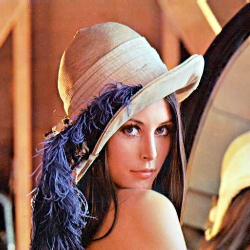

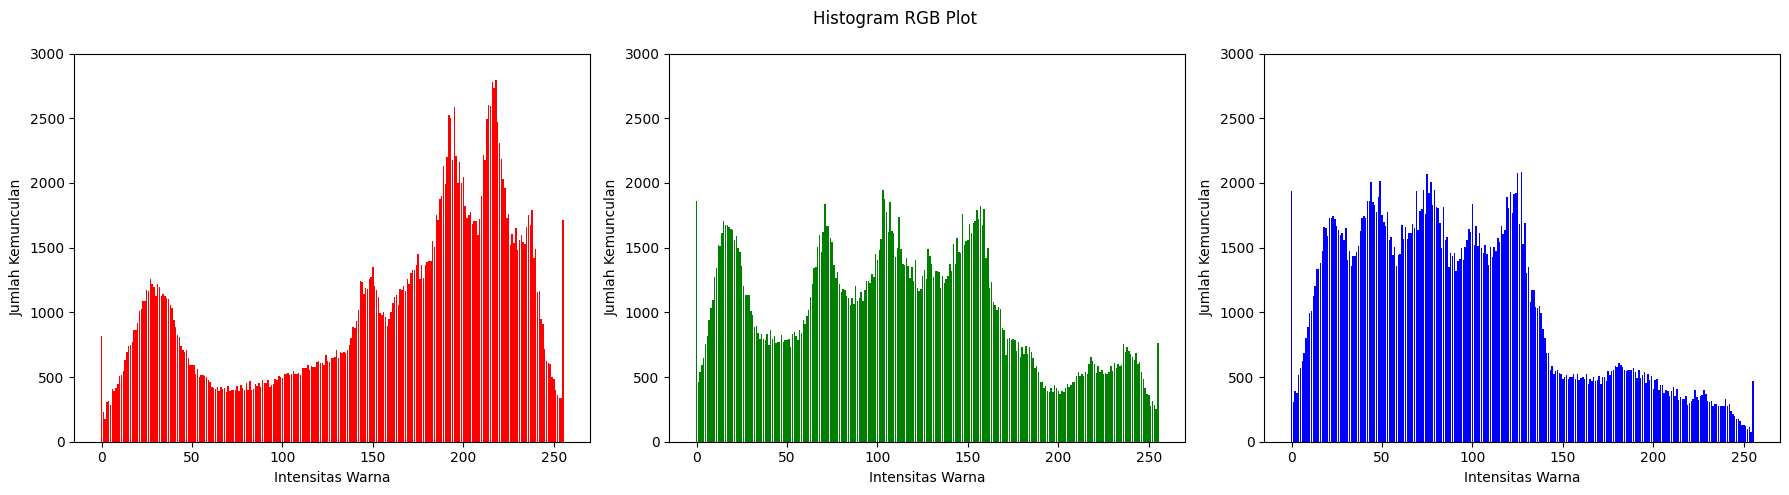

In [3]:
# Input Image
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv.imread(image_path)
image_resized = cv.resize(image, (250, 250))
cv2_imshow(image_resized)

# Menghitung kemunculan setiap pixel warna pada citra
def calculate_histogram_rgb(image):
    blue_channel, green_channel, red_channel = cv.split(image)

    # Menghitung histogram untuk setiap channel
    histogram_blue = cv.calcHist([blue_channel], [0], None, [256], [0, 256])
    histogram_green = cv.calcHist([green_channel], [0], None, [256], [0, 256])
    histogram_red = cv.calcHist([red_channel], [0], None, [256], [0, 256])

    return histogram_red, histogram_green, histogram_blue

# Panggil fungsi untuk menghitung histogram RGB
histogram_red, histogram_green, histogram_blue = calculate_histogram_rgb(image)

# Fungsi untuk menampilkan histogram RGB menggunakan perulangan
def plot_histogram(histogram_red, histogram_green, histogram_blue):
    histograms = [histogram_red, histogram_green, histogram_blue]
    colors = ['red', 'green', 'blue']

    plt.figure(figsize=(18, 5))
    for i, color in enumerate(colors):
        plt.subplot(1, 3, 1+i)
        plt.bar(range(256), histograms[i].ravel(), color=colors[i])
        plt.ylim([0, 3000])
        plt.xlim([-15, 270])

        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')

    plt.suptitle('Histogram RGB Plot')
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan histogram RGB
plot_histogram(histogram_red, histogram_green, histogram_blue)




---
4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


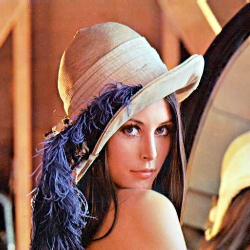

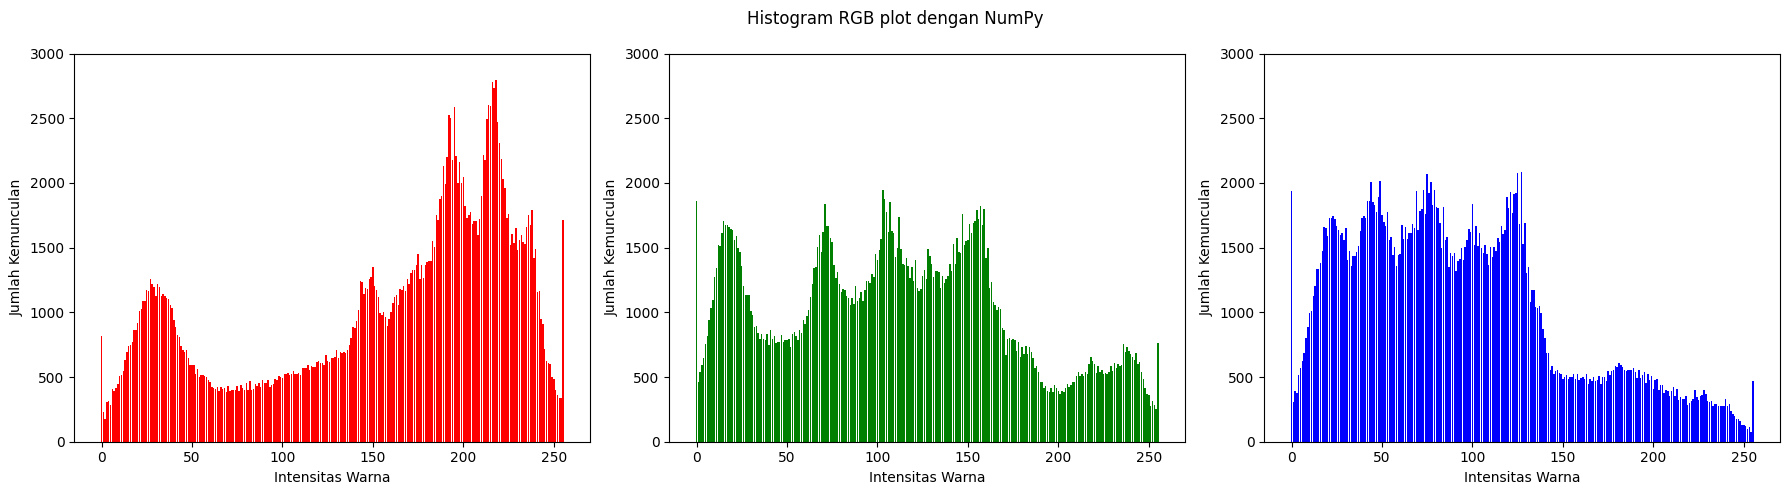

In [4]:
image_path = '/content/drive/MyDrive/PCVK/lena.jpg'
image = cv.imread(image_path)
image_resized = cv.resize(image, (250, 250))
cv2_imshow(image_resized)

# Fungsi untuk menghitung histogram dengan NumPy
def calculate_histogram_numpy(image):
    blue_channel, green_channel, red_channel = cv.split(image)

    histogram_blue, _ = np.histogram(blue_channel.flatten(), bins=256, range=[0, 256])
    histogram_green, _ = np.histogram(green_channel.flatten(), bins=256, range=[0, 256])
    histogram_red, _ = np.histogram(red_channel.flatten(), bins=256, range=[0, 256])

    return histogram_red, histogram_green, histogram_blue

# Menghitung histogram menggunakan NumPy
histogram_red_numpy, histogram_green_numpy, histogram_blue_numpy = calculate_histogram_numpy(image)

# Fungsi untuk menampilkan histogram
def plot_histograms(histogram_red, histogram_green, histogram_blue):
    colors = ['red', 'green', 'blue']
    histograms = [histogram_red, histogram_green, histogram_blue]

    plt.figure(figsize=(18, 5))
    for i, color in enumerate(colors):
        plt.subplot(1, 3, 1 + i)
        plt.bar(range(256), histograms[i], color=color)
        plt.xlabel('Intensitas Warna')
        plt.ylabel('Jumlah Kemunculan')
        plt.ylim([0, 3000])
        plt.xlim([-15, 270])

    plt.suptitle('Histogram RGB plot dengan NumPy')
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan histogram RGB
plot_histograms(histogram_red_numpy, histogram_green_numpy, histogram_blue_numpy)

 * Dapat dilihat bahwa keduanya menghasilkan output yang hampir identik. Metode pertama memanfaatkan fungsi cv.calcHist() dari OpenCV, yang dirancang khusus untuk pemrosesan citra, sedangkan metode kedua menggunakan np.histogram() dari NumPy, yang lebih umum untuk pengolahan data. Meskipun pendekatan yang digunakan berbeda, keduanya menghitung frekuensi kemunculan nilai intensitas piksel dari masing-masing channel warna (merah, hijau, dan biru) dengan prinsip yang sama.

---
5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


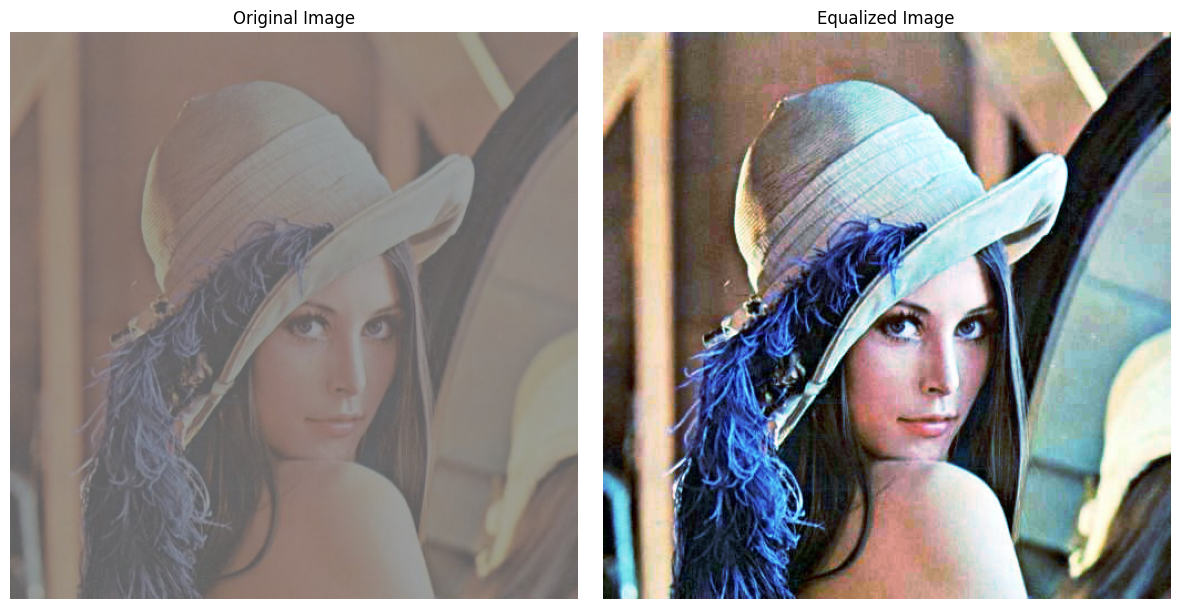

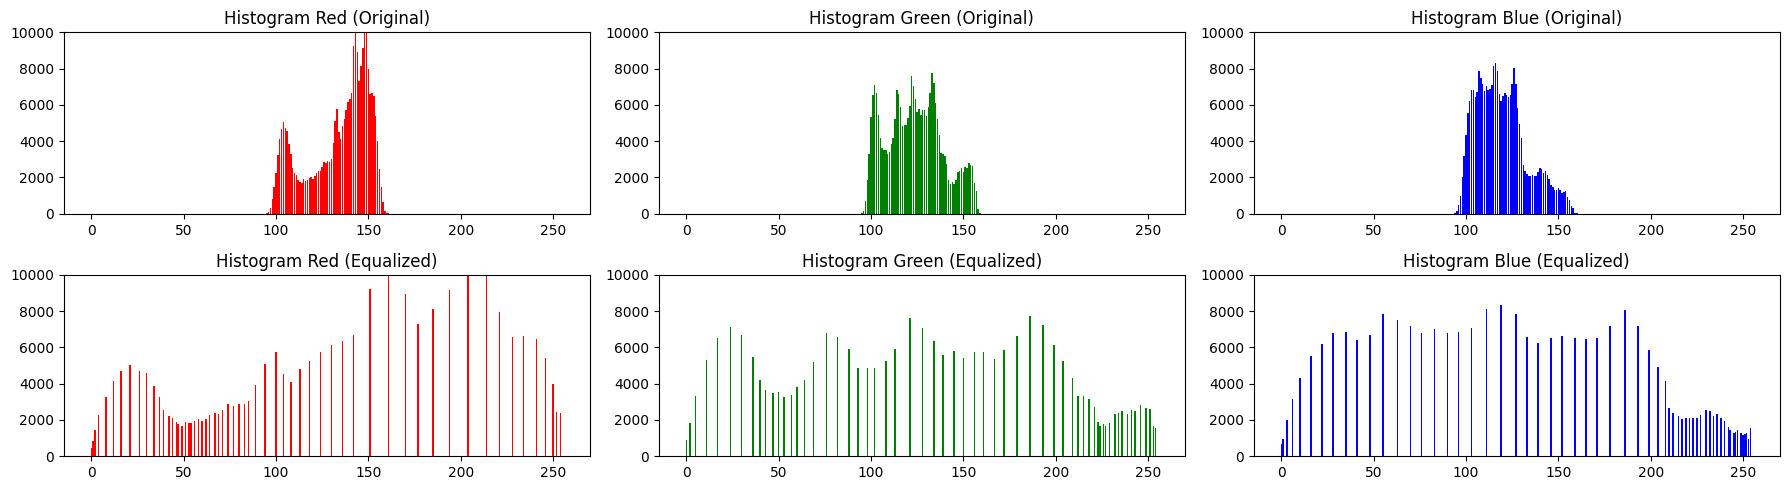

In [5]:
# 1. Input image
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert from BGR to RGB

# 2. Menghitung jumlah kemunculan setiap pixel warna (frekuensi)
hist_red, _ = np.histogram(image_rgb[:, :, 0], bins=256, range=[0, 256])
hist_green, _ = np.histogram(image_rgb[:, :, 1], bins=256, range=[0, 256])
hist_blue, _ = np.histogram(image_rgb[:, :, 2], bins=256, range=[0, 256])

# 3. Penjumlahan kumulatif dari frekuensi
cdf_red = hist_red.cumsum()
cdf_green = hist_green.cumsum()
cdf_blue = hist_blue.cumsum()

# 4. Normalisasi CDF
cdf_normalized_red = cdf_red / cdf_red[-1]
cdf_normalized_green = cdf_green / cdf_green[-1]
cdf_normalized_blue = cdf_blue / cdf_blue[-1]

# 5. Implementasi rumus K0 (Skala Warna)
sk_red = np.floor(255 * cdf_normalized_red).astype(np.uint8)
sk_green = np.floor(255 * cdf_normalized_green).astype(np.uint8)
sk_blue = np.floor(255 * cdf_normalized_blue).astype(np.uint8)

# 6. Hasil Histogram Equalization
image_equalized = np.zeros_like(image_rgb)
image_equalized[:, :, 0] = sk_red[image_rgb[:, :, 0]]
image_equalized[:, :, 1] = sk_green[image_rgb[:, :, 1]]
image_equalized[:, :, 2] = sk_blue[image_rgb[:, :, 2]]

# 7. Transformasi kembali dalam bentuk citra
image_equalized = cv.convertScaleAbs(image_equalized)

# 8. Hitung histogram untuk gambar yang telah di-equalisasi
hist_eq_red, _ = np.histogram(image_equalized[:, :, 0], bins=256, range=[0, 256])
hist_eq_green, _ = np.histogram(image_equalized[:, :, 1], bins=256, range=[0, 256])
hist_eq_blue, _ = np.histogram(image_equalized[:, :, 2], bins=256, range=[0, 256])


def display_images(original, equalized):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Equalized Image')
    plt.imshow(equalized)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_histograms(hist_orig, hist_eq):
    colors = ['red', 'green', 'blue']
    plt.figure(figsize=(18, 5))

    for i, color in enumerate(colors):
        # Histogram untuk gambar asli
        plt.subplot(2, 3, i + 1)
        plt.title(f'Histogram {color.capitalize()} (Original)')
        plt.bar(range(256), hist_orig[i], color=color, width=0.8)
        plt.ylim([0, 10000])
        plt.xlim([-15, 270])

        # Histogram untuk gambar yang telah di-equalisasi
        plt.subplot(2, 3, i + 4)
        plt.title(f'Histogram {color.capitalize()} (Equalized)')
        plt.bar(range(256), hist_eq[i], color=color, width=0.8)
        plt.ylim([0, 10000])
        plt.xlim([-15, 270])

    plt.tight_layout()
    plt.show()

# Gabungkan histogram asli dalam bentuk list
hist_original = [hist_red, hist_green, hist_blue]
hist_equalized = [hist_eq_red, hist_eq_green, hist_eq_blue]

# Tampilkan gambar
display_images(image_rgb, image_equalized)

# Tampilkan histogram
plot_histograms(hist_original, hist_equalized)

---
6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?


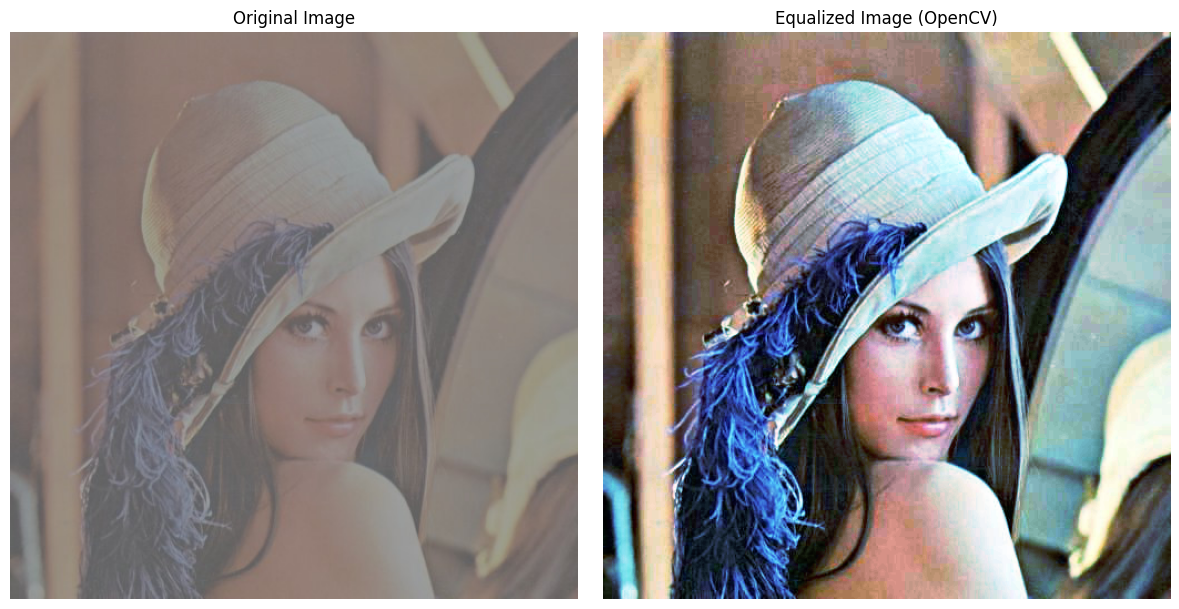

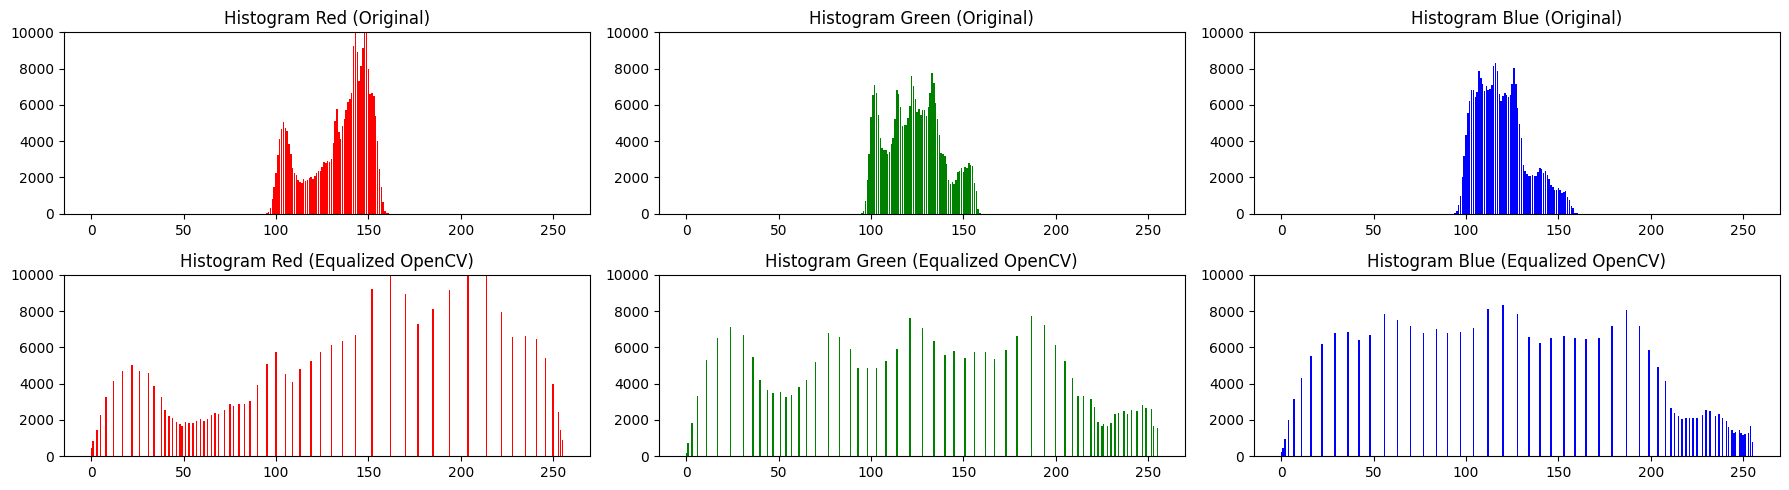

In [6]:
# 1. Input image
image = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)  # Convert from BGR to RGB

# 2. Pisahkan setiap saluran warna
red_channel = image_rgb[:, :, 0]
green_channel = image_rgb[:, :, 1]
blue_channel = image_rgb[:, :, 2]

# 3. Equalisasi histogram untuk setiap saluran warna
equalized_red = cv.equalizeHist(red_channel)
equalized_green = cv.equalizeHist(green_channel)
equalized_blue = cv.equalizeHist(blue_channel)

# 4. Gabungkan saluran yang telah di-equalisasi
image_equalized_cv = cv.merge((equalized_red, equalized_green, equalized_blue))

# 5. Hitung histogram untuk gambar asli
hist_red, _ = np.histogram(red_channel, bins=256, range=[0, 256])
hist_green, _ = np.histogram(green_channel, bins=256, range=[0, 256])
hist_blue, _ = np.histogram(blue_channel, bins=256, range=[0, 256])

# Hitung histogram untuk gambar yang telah di-equalisasi dengan cv
hist_eq_red, _ = np.histogram(equalized_red, bins=256, range=[0, 256])
hist_eq_green, _ = np.histogram(equalized_green, bins=256, range=[0, 256])
hist_eq_blue, _ = np.histogram(equalized_blue, bins=256, range=[0, 256])

def display_images(original, equalized):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Equalized Image (OpenCV)')
    plt.imshow(equalized)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def plot_histograms(hist_orig, hist_eq):
    colors = ['red', 'green', 'blue']
    plt.figure(figsize=(18, 5))

    for i, color in enumerate(colors):
        # Histogram untuk gambar asli
        plt.subplot(2, 3, i + 1)
        plt.title(f'Histogram {color.capitalize()} (Original)')
        plt.bar(range(256), hist_orig[i], color=color, width=0.8)
        plt.ylim([0, 10000])
        plt.xlim([-15, 270])

        # Histogram untuk gambar yang telah di-equalisasi
        plt.subplot(2, 3, i + 4)
        plt.title(f'Histogram {color.capitalize()} (Equalized OpenCV)')
        plt.bar(range(256), hist_eq[i], color=color, width=0.8)
        plt.ylim([0, 10000])
        plt.xlim([-15, 270])

    plt.tight_layout()
    plt.show()

# Gabungkan histogram asli dalam bentuk list
hist_original = [hist_red, hist_green, hist_blue]
hist_equalized = [hist_eq_red, hist_eq_green, hist_eq_blue]

# Tampilkan gambar
display_images(image_rgb, image_equalized_cv)

# Tampilkan histogram
plot_histograms(hist_original, hist_equalized)


* Dari analisis dua pendekatan dalam melakukan histogram equalization pada citra RGB, dapat disimpulkan bahwa meskipun kedua metode (manual dengan NumPy dan fungsi cv.equalizeHist() dari OpenCV) mampu menghasilkan peningkatan kontras yang signifikan, terdapat perbedaan dalam kompleksitas dan efisiensi. Metode manual yang dijelaskan dalam kode pertama memerlukan beberapa langkah, termasuk perhitungan frekuensi piksel, Cumulative Distribution Function (CDF), dan normalisasi, sehingga lebih memakan waktu dan rentan terhadap kesalahan. Di sisi lain, metode OpenCV yang diterapkan dalam kode kedua menawarkan solusi yang lebih cepat dan sederhana, dengan hasil yang identik dalam hal kualitas citra.

---
7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

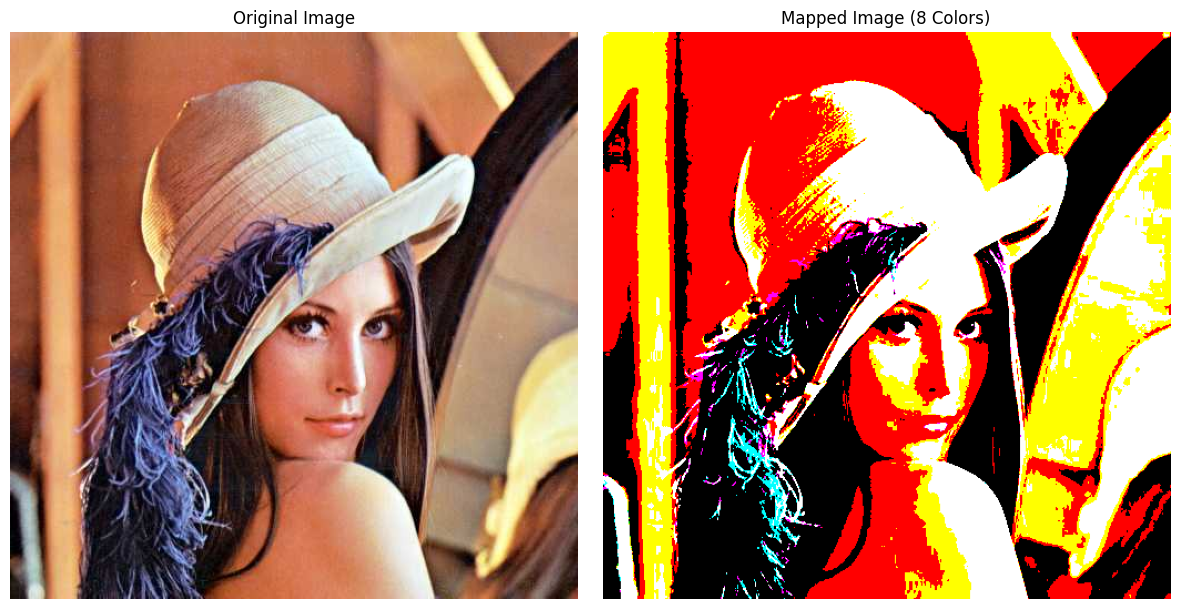

In [7]:
# Input image
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Definisikan warna dasar dalam format RGB
colors = {
    'black': np.array([0, 0, 0]),
    'green': np.array([0, 255, 0]),
    'yellow': np.array([255, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'white': np.array([255, 255, 255])
}

# Pemetaan warna
mapped_image = np.zeros_like(image)
height, width, _ = image.shape

# Proses pemetaan warna
for i in range(height):
    for j in range(width):
        # Mengambil warna piksel saat ini
        pixel_color = image[i, j]

        # Menghitung jarak euclidean ke setiap warna target
        distances = np.linalg.norm(np.array(list(colors.values())) - pixel_color, axis=1)

        # Menemukan indeks warna target terdekat
        closest_color_index = np.argmin(distances)

        # Mengatur piksel pada citra yang dipetakan dengan warna terdekat
        mapped_image[i, j] = list(colors.values())[closest_color_index]

# Mengonversi citra dari BGR ke RGB untuk tampilan
img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
mapped_image_rgb = cv.cvtColor(mapped_image, cv.COLOR_BGR2RGB)


# Tampilkan gambar asli dan hasil pemetaan
def display_images(original, mapped):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Mapped Image (8 Colors)')
    plt.imshow(mapped)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Tampilkan gambar
display_images(img_rgb, mapped_image_rgb)


---
8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

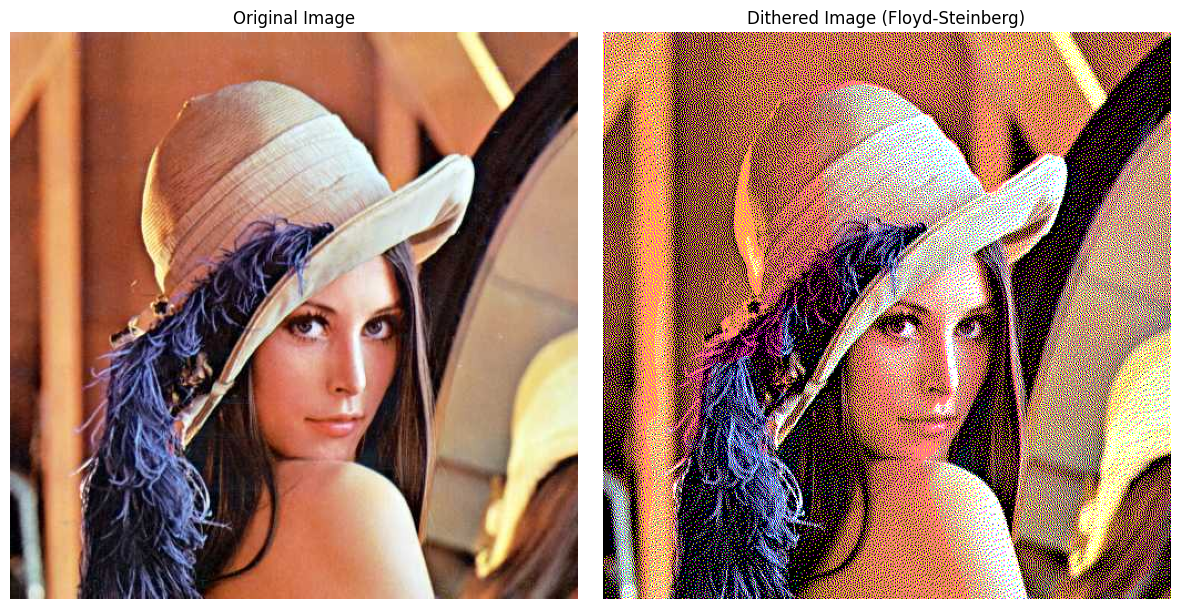

In [8]:
# Input image
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')

# Konversi dari BGR ke RGB
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Fungsi untuk mencari warna terdekat (Anda perlu mengimplementasikannya)
def closest_color(pixel):
    colors = {
        'black': np.array([0, 0, 0]),
        'green': np.array([0, 255, 0]),
        'yellow': np.array([255, 255, 0]),
        'blue': np.array([0, 0, 255]),
        'cyan': np.array([0, 255, 255]),
        'magenta': np.array([255, 0, 255]),
        'white': np.array([255, 255, 255])
    }

    # Menghitung jarak Euclidean untuk mencari warna terdekat
    distances = [np.linalg.norm(pixel - color) for color in colors.values()]
    closest_index = np.argmin(distances)

    return list(colors.values())[closest_index]

# Fungsi untuk melakukan dithering menggunakan algoritma Floyd-Steinberg
def floyd_steinberg_dithering(image):
    height, width, _ = image.shape
    dithered_image = np.copy(image).astype(float)  # Menggunakan float untuk operasi

    for y in range(height):
        for x in range(width):
            old_pixel = dithered_image[y, x].copy()  # Salin nilai pixel lama
            new_pixel = closest_color(old_pixel)  # Mencari warna terdekat
            dithered_image[y, x] = new_pixel  # Mengatur pixel dengan warna terdekat

            # Menghitung kesalahan
            error = old_pixel - new_pixel

            # Menyebarkan kesalahan ke pixel tetangga
            if x + 1 < width:  # Pixel kanan
                dithered_image[y, x + 1] += error * (7 / 16)
            if x - 1 >= 0 and y + 1 < height:  # Pixel bawah kiri
                dithered_image[y + 1, x - 1] += error * (3 / 16)
            if y + 1 < height:  # Pixel bawah
                dithered_image[y + 1, x] += error * (5 / 16)
            if x + 1 < width and y + 1 < height:  # Pixel bawah kanan
                dithered_image[y + 1, x + 1] += error * (1 / 16)

    # Mengonversi kembali ke uint8 dan membatasi nilai antara 0-255
    return np.clip(dithered_image, 0, 255).astype(np.uint8)


# Dithering gambar
dithered_image = floyd_steinberg_dithering(image_rgb)

# Tampilkan gambar asli dan hasil dithering
def display_images(original, dithered):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Dithered Image (Floyd-Steinberg)')
    plt.imshow(dithered)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Tampilkan gambar
display_images(image_rgb, dithered_image)


---
9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!


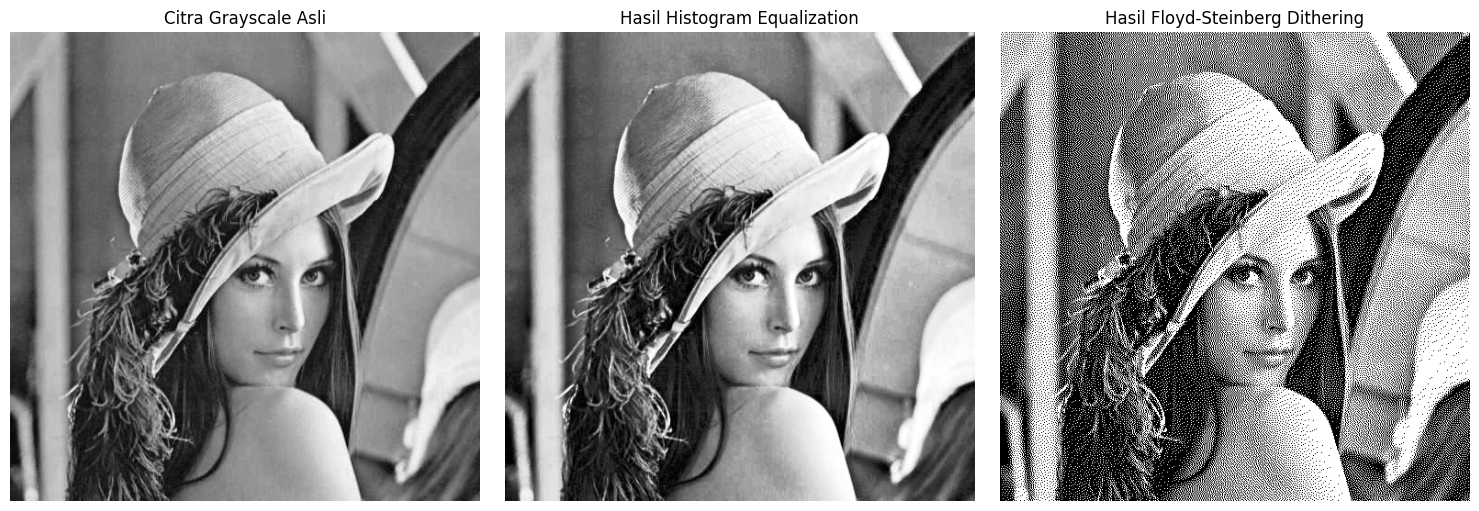

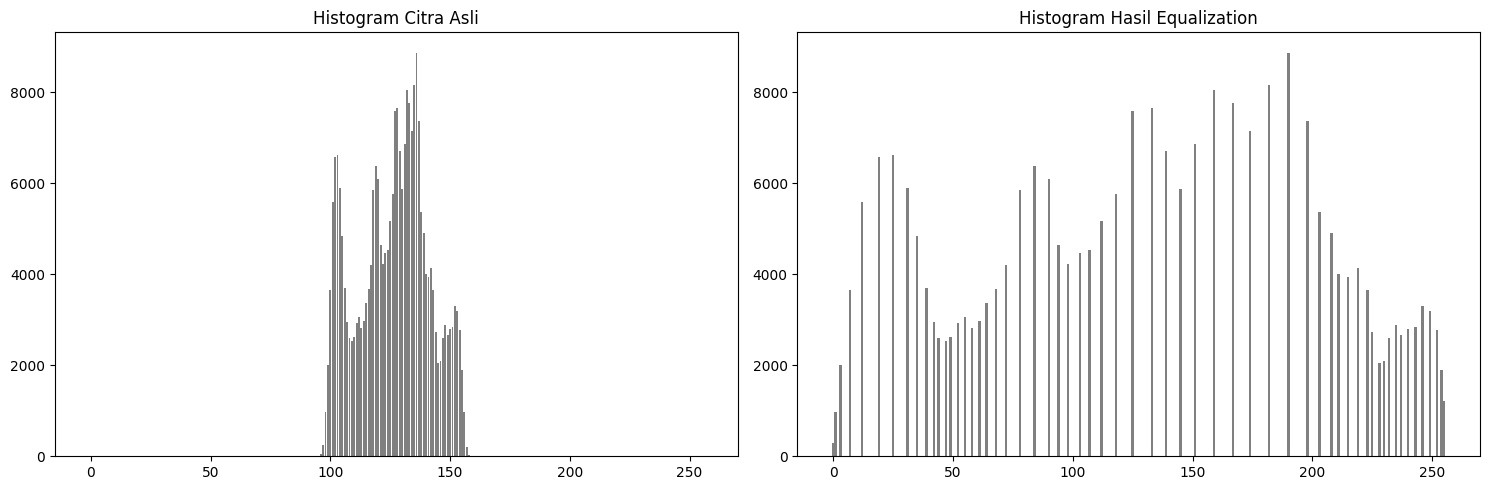

In [9]:
# Fungsi untuk menemukan warna terdekat (0 atau 255)
def closest_color(pixel_value):
    return 255 if pixel_value > 127 else 0  # Threshold di 127

# Fungsi untuk melakukan dithering menggunakan algoritma Floyd-Steinberg
def floyd_steinberg_dithering(image):
    height, width = image.shape
    dithered_image = np.copy(image).astype(float)  # Menggunakan float untuk operasi

    for y in range(height):
        for x in range(width):
            old_pixel = dithered_image[y, x].copy()  # Salin nilai pixel lama
            new_pixel = closest_color(old_pixel)  # Mencari warna terdekat
            dithered_image[y, x] = new_pixel  # Mengatur pixel dengan warna terdekat

            # Menghitung kesalahan
            error = old_pixel - new_pixel

            # Menyebarkan kesalahan ke pixel tetangga
            if x + 1 < width:  # Pixel kanan
                dithered_image[y, x + 1] += error * (7 / 16)
            if x - 1 >= 0 and y + 1 < height:  # Pixel bawah kiri
                dithered_image[y + 1, x - 1] += error * (3 / 16)
            if y + 1 < height:  # Pixel bawah
                dithered_image[y + 1, x] += error * (5 / 16)
            if x + 1 < width and y + 1 < height:  # Pixel bawah kanan
                dithered_image[y + 1, x + 1] += error * (1 / 16)

    # Mengonversi kembali ke uint8 dan membatasi nilai antara 0-255
    return np.clip(dithered_image, 0, 255).astype(np.uint8)

def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)  # Array untuk menyimpan frekuensi setiap nilai intensitas

    # Menghitung frekuensi setiap nilai intensitas
    for pixel_value in image.ravel():  # Mengubah citra 2D menjadi 1D
        histogram[pixel_value] += 1  # Increment frekuensi untuk nilai intensitas tertentu

    return histogram

def display_images(original_image, equalized_image, dithered_image):
    plt.figure(figsize=(15, 5))

    # Menampilkan citra grayscale asli
    plt.subplot(1, 3, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Citra Grayscale Asli')
    plt.axis('off')

    # Menampilkan citra hasil histogram equalization
    plt.subplot(1, 3, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Hasil Histogram Equalization')
    plt.axis('off')

    # Menampilkan citra hasil dithering
    plt.subplot(1, 3, 3)
    plt.imshow(dithered_image.astype(np.uint8), cmap='gray')
    plt.title('Hasil Floyd-Steinberg Dithering')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def display_histograms(original_image, equalized_image):
    plt.figure(figsize=(15, 5))

    # Menghitung histogram untuk citra grayscale asli
    hist_original = calculate_histogram(original_image)

    # Menghitung histogram untuk citra hasil histogram equalization
    hist_equalized = calculate_histogram(equalized_image)

    # Diagram batang untuk citra grayscale asli
    plt.subplot(1, 2, 1)
    plt.bar(range(256), hist_original, width=0.8, color='gray')
    plt.title('Histogram Citra Asli')
    plt.xlim(-15, 270)

    # Diagram batang untuk citra hasil histogram equalization
    plt.subplot(1, 2, 2)
    plt.bar(range(256), hist_equalized, width=1, color='gray')
    plt.title('Histogram Hasil Equalization')
    plt.xlim(-15, 270)

    plt.tight_layout()
    plt.show()

# Membaca citra dari jalur yang ditentukan
image_path = '/content/drive/MyDrive/PCVK/lena_lc.jpg'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Menerapkan Histogram Equalization
equalized_image = cv.equalizeHist(image)

# Menerapkan Floyd-Steinberg Dithering
dithered_image = floyd_steinberg_dithering(equalized_image)

# Menampilkan citra
display_images(image, equalized_image, dithered_image)

# Menampilkan histogram
display_histograms(image, equalized_image)
